## KING COUNTY HOUSE PRICE PREDICTION

## Final Project Submission

Please fill out: GROUP 5
* Student name: Prudence Coredo, Titus Mutuku, Gloria Nyongesa, Candy  Gudda, Erick Lintari, Sadi Kiri
* Student pace:full time
* Scheduled project review date/time: 
* Instructor name: Diana Mongina
* Blog post URL:


# Overview
This project leverages the King County House Sales dataset to perform a comprehensive analysis of house sales in a Northwest county using multiple linear regression modeling. Our primary aim is to empower local real estate agencies with the insights required to address inquiries, particularly from homeowners. We seek to identify the pivotal factors that significantly impact house prices and quantify the extent of their influence on property values and potential appreciation.

# Business Understanding
To identify how house prices are affected by various factors and to provide a guide on how to best identify properties that bear a high resell value for to maximize on profit margins.

# Background 
King County has witnessed a vibrant real estate market.The housing market in this county is competitive, and homeowners looking to buy or sell properties frequently seek guidance from local real estate agencies. One common concern among homeowners is the potential value added by home renovations. This project aims to provide data-driven insights into this issue, helping homeowners make informed decisions on their properties. The King County House Sales dataset serves as a valuable resource for this analysis.

## Data Exploration/Understanding
- This dataset contains house sales prices for King County. It includes homes sold between May 2014 and May 2015.
- The dependent Variable: Sales Price / Selling Price
- The predictors: the sale date, renovation year, number of bedrooms and bathrooms, number of floors, the square footage of the   houses (both living and lot), and available view of waterfront. Also, the dataset contains the grade and condition of each       house.
- Datatypes: All are integers or Float except the  date and sqft_basement (object).
- Distribution of our data:
   - continuous: sqft_living, sqft_lot, sqft_above, sqft_basement (after adjustment), gap year between sold and built/renovated
   - discrete: bedrooms, bathrooms, grade, floors, condition
   - categorical: waterfront
- Our datasets contain 21,597 items of house sale information
- We will eliminate the information such as house ID, zipcode, latitude and longitude, and whether the house has been viewed or not.

### Importing Libraries

#### Importing the relevant modules and the dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset using pandas

In [2]:
# Loading the data
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21597 rows and 21 columns. Each row of the dataset contains information about one house.

Our objective is to find a way to estimate the value in the "price" column using the values in the other columns. By achieving this using this set of data, then we should able to estimate prices of other houses too, simply by asking for information like bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement' etc

### Data Understanding

Obtaing the statistical summary of our dataset such as mean, standard deviation, median etc

In [3]:
#Obtaining the statistical summary of the data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


Checking for more information on our data

In [4]:
# Get more infomation on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Checking for any missing values in our data

In [5]:
#Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Data Cleaning / Preparation

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis

Dropping columns that will not be usefull in our analysis

In [6]:
df_cleaned = df.drop(['id','date','view','sqft_living15','sqft_lot15','sqft_basement',"sqft_above",'yr_renovated'], axis = 1)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,98144,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004,98027,47.5345,-122.069


In [7]:
#Checking information of the data after dropping the columns
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


Checking to see if there are any missing values in our data

In [8]:
#Checking for null values in cleaned dataset
df_cleaned.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

We can see that the waterfront column has missing values therefore we go ahead and replace them with the median.


In [9]:

#Create the Missing Value Indicator Column ('waterfront_miss'):
df_cleaned['waterfront_miss'] = df_cleaned['waterfront'].isna().astype(int)

#Replace 'NO' with 0 and 'YES' with 1:
df_cleaned.replace({'NO': 0, 'YES': 1}, inplace=True)

#Impute Missing Values in 'waterfront' with the Median:
median_waterfront = df_cleaned['waterfront'].median()
df_cleaned['waterfront'].fillna(median_waterfront, inplace=True)

In [10]:
df_cleaned['waterfront'].value_counts()

waterfront
0.0    21451
1.0      146
Name: count, dtype: int64

In [11]:
#Checking for duplicates
df_cleaned.duplicated().sum()

4

In [12]:
#removing duplicates
df_cleaned= df_cleaned.drop_duplicates()


In [13]:
#Checking the frequency of unique values in each column 
for val in df_cleaned:
   print(df_cleaned[val].value_counts())
   print()

price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3622, dtype: int64

bedrooms
3     9821
4     6882
2     2759
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

bathrooms
2.50    5375
1.00    3851
1.75    3048
2.25    2046
2.00    1929
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: count, Length: 1034, dtype: int64

sqft_lot
5

In [14]:
# Spliting the grade column to a new column which only has the grade value in numbers.

df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].str.split(' ').str[0]

In [15]:
#Changing the data type of grade from str to int
df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].astype(np.int64)

In [16]:
# Changing  catergorical data in the condition column to numeric

df_cleaned.loc[:,'condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,waterfront_miss
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,1
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,98103,47.6993,-122.346,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,98146,47.5107,-122.362,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,98144,47.5944,-122.299,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004,98027,47.5345,-122.069,1


This will now make it easier when carrying out statistical measurements.

In [17]:
# From this we can tell the condition of most houses is average.
df_cleaned['condition'].value_counts()

condition
3    14016
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [18]:
#Checking data information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21593 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21593 non-null  float64
 1   bedrooms         21593 non-null  int64  
 2   bathrooms        21593 non-null  float64
 3   sqft_living      21593 non-null  int64  
 4   sqft_lot         21593 non-null  int64  
 5   floors           21593 non-null  float64
 6   waterfront       21593 non-null  float64
 7   condition        21593 non-null  object 
 8   grade            21593 non-null  object 
 9   yr_built         21593 non-null  int64  
 10  zipcode          21593 non-null  int64  
 11  lat              21593 non-null  float64
 12  long             21593 non-null  float64
 13  waterfront_miss  21593 non-null  int32  
dtypes: float64(6), int32(1), int64(5), object(2)
memory usage: 2.4+ MB


Our data is now cleaned and ready to be analysed

## Exploratory Data Analysis

Exploratory Data Analysis involves exploration and assessment the dataset to uncover its main characteristics, using various tools and methods such as visualizations and statistics.

Data Distribution

In [19]:
!pip install --upgrade pandas


Requirement already up-to-date: pandas in c:\users\homepc\anaconda3\envs\learn-env\lib\site-packages (2.0.3)


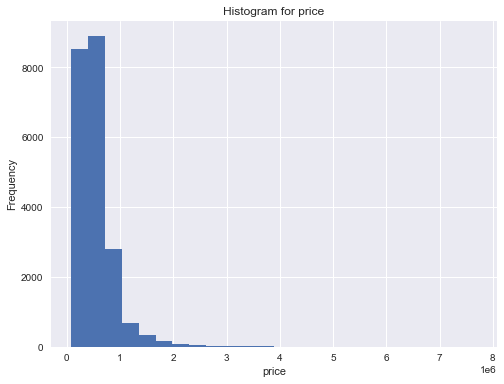

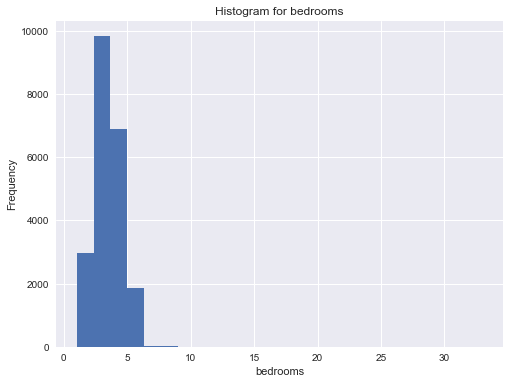

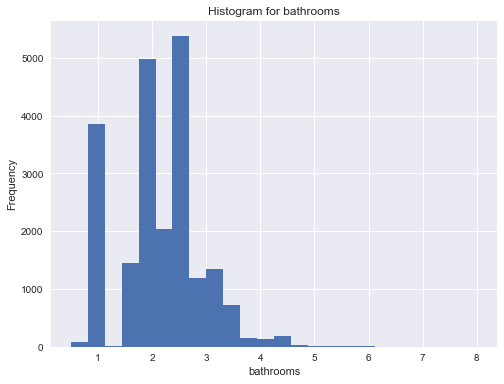

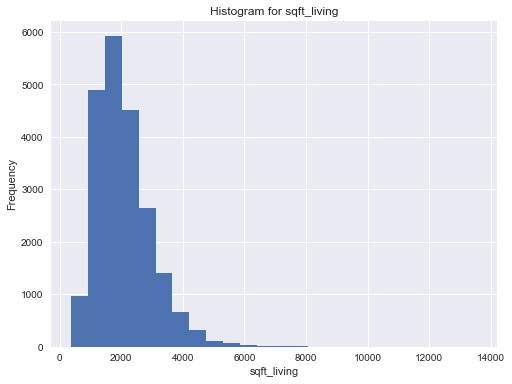

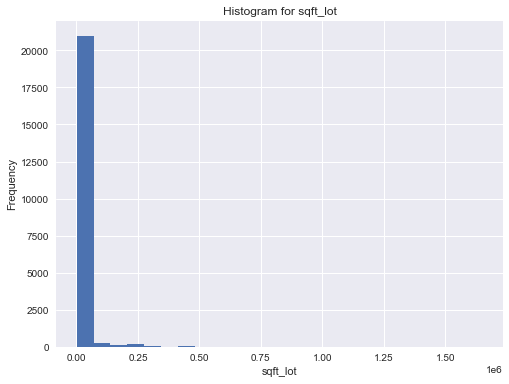

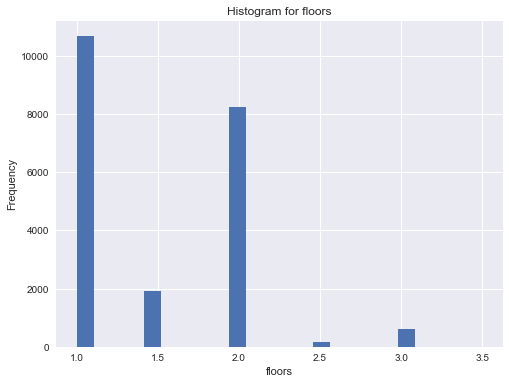

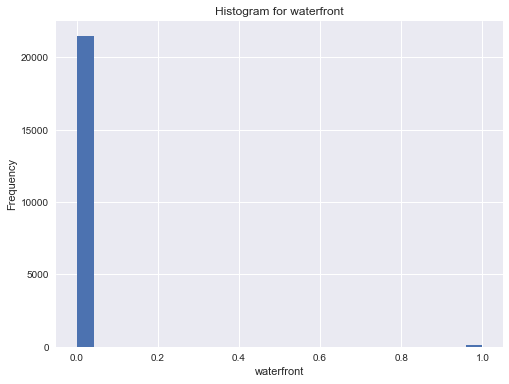

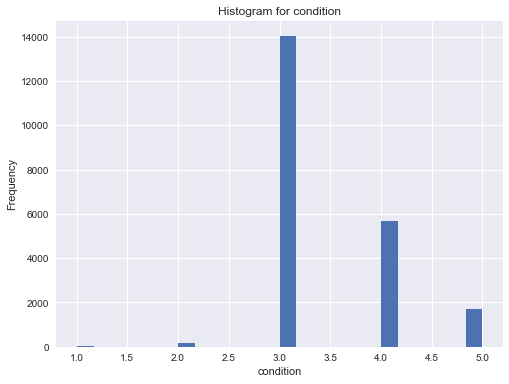

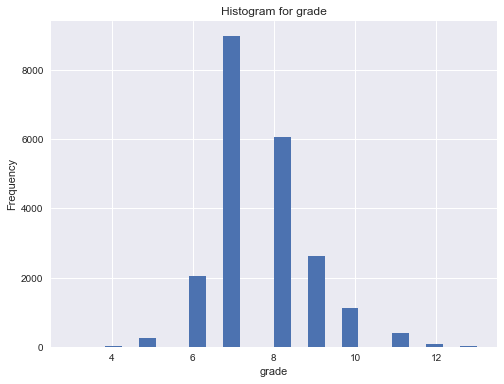

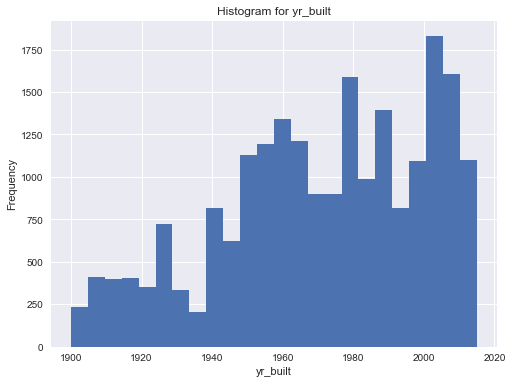

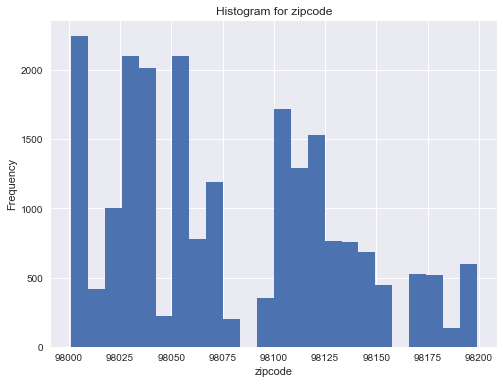

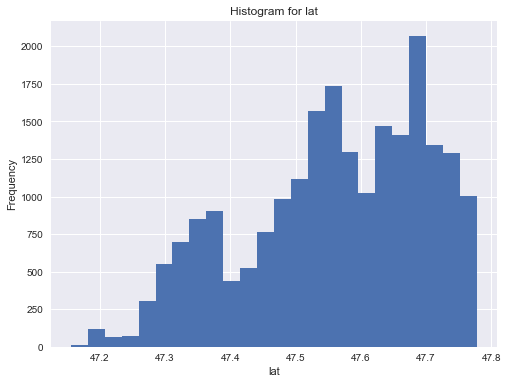

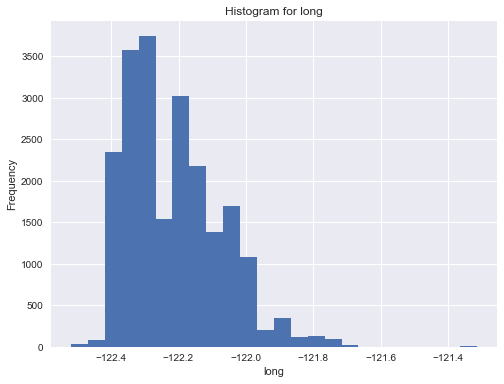

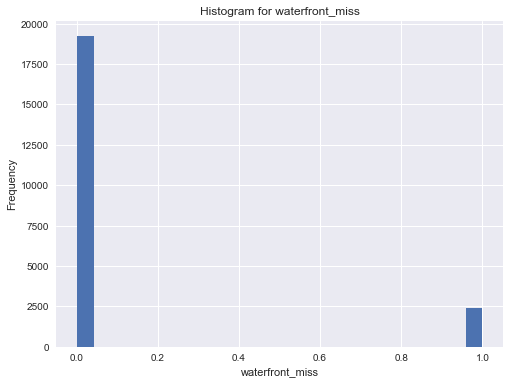

In [22]:
#plotting histograms to visualize patterns in the data
for column in df_cleaned.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.hist(df_cleaned[column], bins=24)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## The relationship between Target and predictor variable

To examine and visualize the relationship between variables

In [23]:
#Checking the statistical summary of price column
df_cleaned['price'].describe()

count    2.159300e+04
mean     5.403073e+05
std      3.673971e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

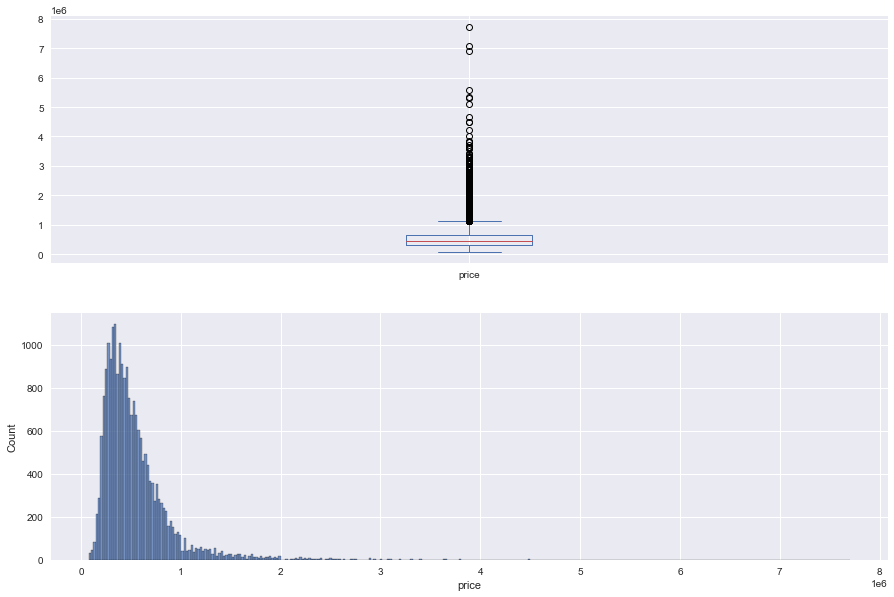

In [24]:
# creating two plots to visualize the distribution of a 'price' column in the cleaned Dataframe
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1 = df_cleaned['price'].plot.box()
ax2 = fig.add_subplot(212)
ax2 = sns.histplot(data=df_cleaned, x='price')

In [25]:
# Calculate the mean, median, and mode and the max_price
# Calculate the mean
mean_price = df_cleaned['price'].mean()

# Calculate the median
median_price = df_cleaned['price'].median()

# Calculate the mode
mode_price = df_cleaned['price'].mode()
# Calculate Maximum price 
max_price = df_cleaned['price'].max()

print(f"The maximum price is: {max_price}")
print(f"The mean price is: {mean_price}")
print(f"The median price is: {median_price}")
print(f"The mode price is: {mode_price}")

The maximum price is: 7700000.0
The mean price is: 540307.3055156764
The median price is: 450000.0
The mode price is: 0    350000.0
1    450000.0
Name: price, dtype: float64


**Comments**
- Observations: The Price data is heavily skewed because it is apparent there are many outliers. The average price of a house in King County is 540k while the median price is 450k which can be associated with affordability and the Middle class members of the society. the highest priced house/home is at $7.7 Million which is significaqntly higher compared to the average price
* Action: Remove the Outliers in the price field/column because most clients of the expected clients are middle class hence the target clients for all investors. 

In [26]:
df_new = df_cleaned[(df_cleaned.price < df_cleaned.price.quantile(0.995)) & (df_cleaned.price > df_cleaned.price.quantile(.005))].copy()
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,waterfront_miss
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,1
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,98103,47.6993,-122.346,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,98146,47.5107,-122.362,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,98144,47.5944,-122.299,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004,98027,47.5345,-122.069,1


Removed outliers from the price column using quantile

### Analyzing Grade

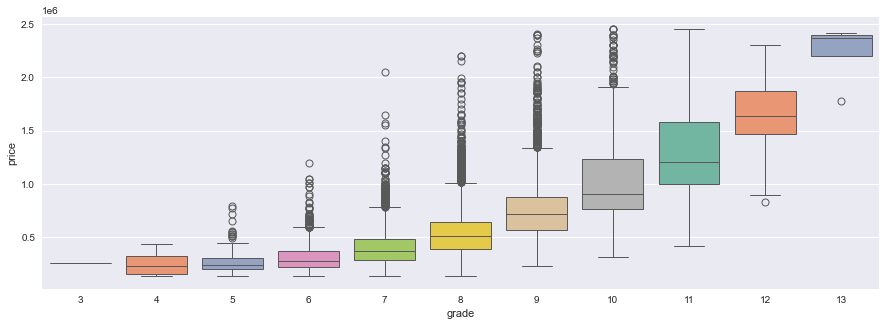

In [27]:
#Price vs Grade
# Creating the boxplot with a different color palette
plt.figure(figsize=(15, 5))
sns.boxplot(x='grade', y='price', data=df_new, palette='Set2')

# Showing the plot
plt.show()

Grade represents  the construction quality of improvements. They run from grade 3 to 13 with a grade of 3 defined as the "falling short of minimum building standards while a grade 13 is generally defined as custom built with quality standards. From our visualization above, we can see that price and grade are positively correlated. The higher the grade of a house, the higher the price it goes for.

### Analyzing square foot living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

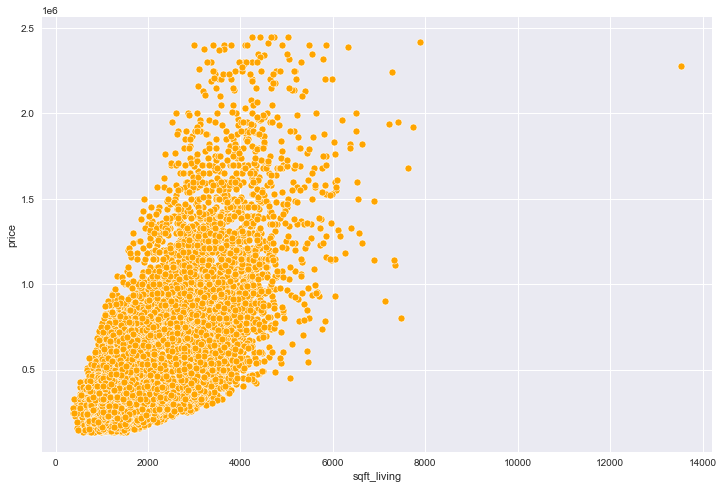

In [28]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='sqft_living',y='price',data=df_new,color= 'orange')

From the scatter plot we can tell that sqft_living is positively correlated to price. It helps conclude that a higher sqft_living results in a higher price. Also most houses have a sqft_living area in the range of about 2000 sqft to 4000 sqft.

### Analyzing Number of Bathrooms

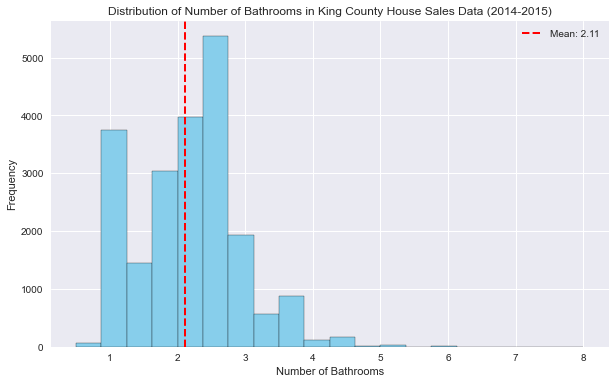

In [29]:
bathrooms= df_new['bathrooms']

#mean
mean_bathrooms =  bathrooms.mean()
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(bathrooms, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bathrooms in King County House Sales Data (2014-2015)')
plt.grid(True)

# Add a vertical line at the mean
plt.axvline(mean_bathrooms, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_bathrooms:.2f}')

# Show the histogram
plt.legend()
plt.show()

Based on this values, the peak(mode) of the data is around 2.5. Most houses have 2-3 bathrooms.
This distribution does not have outliers.
Based on the mean and the mode, the estimate gives a point for where the center of the data is located.

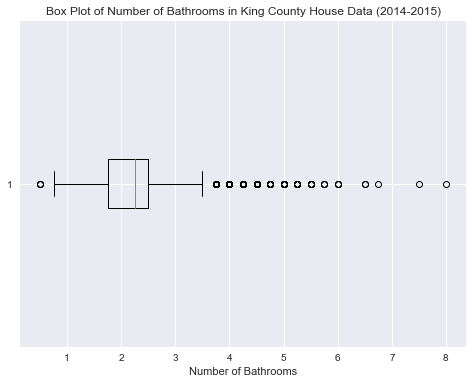

In [30]:
plt.figure(figsize=(8, 6))
plt.boxplot(bathrooms,vert= False)  # vert=False for a horizontal box plot
plt.xlabel('Number of Bathrooms')
plt.title('Box Plot of Number of Bathrooms in King County House Data (2014-2015)')
plt.grid(True)
plt.show()

The data indicates potential presence of outliers in the data that probably have affected the mean

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = bathrooms.quantile(0.25)
Q3 = bathrooms.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN in the original "bathrooms" column
df_new['bathrooms'][~((bathrooms >= lower_bound) & (bathrooms <= upper_bound))] = None

In [ ]:
mean_bathrooms = df_new['bathrooms'].mean()
df_new['bathrooms'].fillna(mean_bathrooms, inplace=True)

In [ ]:
# confirming that outliers have been removed
# Create a box plot for the "bathrooms" column in the updated data
plt.figure(figsize=(8, 6))
plt.boxplot(df_new['bathrooms'][df_new['bathrooms'].notna()], vert=False)  # vert=False for a horizontal box plot
plt.xlabel('Number of Bathrooms')
plt.title('Box Plot of Number of Bathrooms in King County House Sales Data (Outliers Removed)')
plt.grid(True)
plt.show()

In [31]:
df_new['bathrooms'].value_counts()

bathrooms
2.50    5370
1.00    3756
1.75    3045
2.25    2046
2.00    1927
1.50    1443
2.75    1184
3.00     744
3.50     722
3.25     571
3.75     148
4.00     124
4.50      93
4.25      70
0.75      65
5.00      16
4.75      15
5.25      10
1.25       9
5.50       5
0.50       3
6.00       3
5.75       3
6.50       2
6.75       1
7.50       1
8.00       1
Name: count, dtype: int64

Most houses in our dataset have 2 bathrooms

### Analyzing Condition

 This investigation will provide valuable assessment of the condition of houses in King County as per our dataset, potentially influencing pricing strategies, buyer preferences and investments into the housing sector in King County.

In [32]:
# We use the value_counts method to visualize the frequencies of the ratings
# We see that despite dropping the records with outliers in the price column, the distribution of ratings has not significantly change
df_new['condition'].value_counts().to_frame()

,count
condition,
3,13883
4,5628
5,1686
2,157
1,23


Next, we use a histogram to further enhance our visualization of how these ratings are distributed.

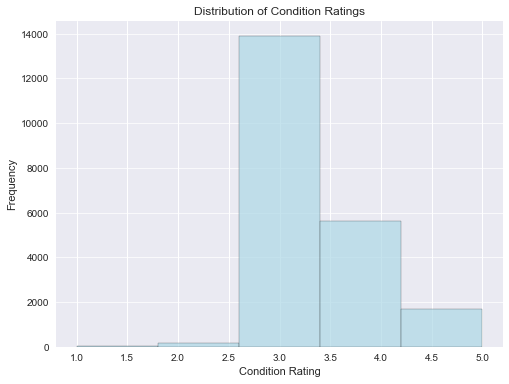

In [33]:
# Plot a histogram to show the distribution of the condition column
plt.figure(figsize=(8, 6)) 
num_bins = 5
plt.hist(df_new['condition'], bins=num_bins, color='lightblue', alpha=0.7, edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Condition Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Condition Ratings')

plt.show();

Since the feature condition represents quality ratings, our histogram visualization reveals key insights about the quality distribution within the dataset. 

We observe that a significant portion of the houses are rated as "average". This suggests that "average" quality is the prevailing condition of most houses in our dataset. 

It is also important to note that there are house with ratings above and below average implying that we have a variability in quality.

### Analyzing Bedrooms

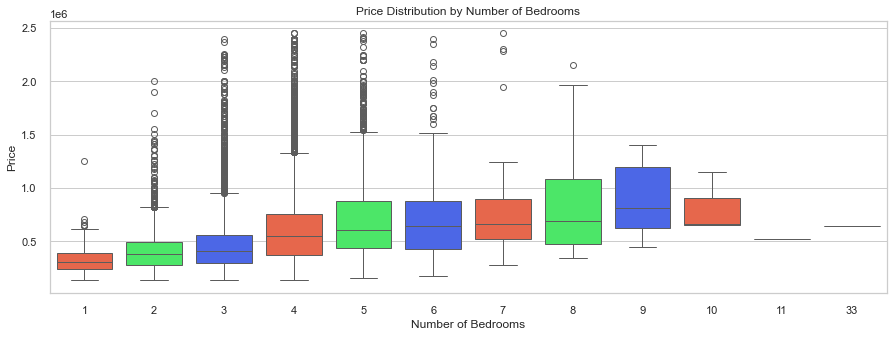

In [34]:
##Price vs Bedrooms
# Seting the style for the boxplot
sns.set(style="whitegrid")
# Defining the custom colors
boxplot_colors = ["#FF5733", "#33FF57", "#3357FF"]
# Create the boxplot with custom colors
plt.figure(figsize=(15, 5))
sns.boxplot(x='bedrooms', y='price', data=df_new, palette=boxplot_colors)
# Add a title
plt.title("Price Distribution by Number of Bedrooms")

# Customize the axis labels
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

plt.show()

In [35]:
#Replacing the outlier with the mean
df_new.loc[(df_new.bedrooms == 33), 'bedrooms'] = 3
df_new['bedrooms'].value_counts()

bedrooms
3     9777
4     6836
2     2699
5     1560
6      265
1      182
7       36
8       12
9        6
10       3
11       1
Name: count, dtype: int64

The mode of the bedroom column is 3, which means most houses haveof 3 bedrooms.

### Correlation Matrix

Using a heatmap to find out the correlation between the variables of this data set

In [36]:
# Finding out the correlation between the features
df_new.corr()['price']

price              1.000000
bedrooms           0.316654
bathrooms          0.509486
sqft_living        0.682378
sqft_lot           0.098745
floors             0.271005
waterfront         0.164017
condition          0.035434
grade              0.678498
yr_built           0.053203
zipcode           -0.045708
lat                0.343698
long               0.031426
waterfront_miss   -0.002203
Name: price, dtype: float64

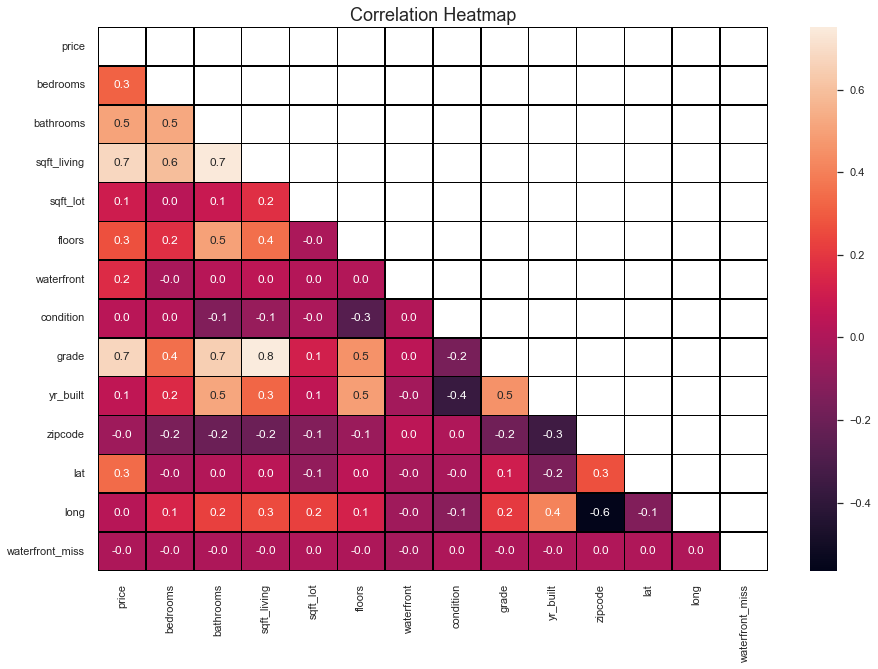

In [37]:
# Plotting a correlation heatmap using seaborn. Border the squares with black color, show the correlation index and round it up.
# Create a mask to hide the upper triangular part of the matrix
mask = np.triu(np.ones_like(df_new.corr(), dtype=bool))
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(df_new.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='1.1f', mask=mask)

# Give a title to the map and display it.
plt.title('Correlation Heatmap', size=18)
plt.show()

## MODELLING

## Regression Analysis:

We will focus specifically on a subset of the overall dataset to perform our regression analysis. Regression analysis will allow us to quantify the extent to which these features affect house prices and provide a predictive model for pricing. 

The features considered are those that are highly correlated with our target price 'price' as seen from our correlation matrix and correlation heatmap.
They include: sqft_living, 
              bathrooms,bedrooms, , sqft_lot, waterfront, grade,floors,condition.

In [38]:
df_subset = df_new[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'waterfront', 'grade','floors','condition','price']]
df_subset

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,floors,condition,price
0,3,1.00,1180,5650,0.0,7,1.0,3,221900.0
1,3,2.25,2570,7242,0.0,7,2.0,3,538000.0
2,2,1.00,770,10000,0.0,6,1.0,3,180000.0
3,4,3.00,1960,5000,0.0,7,1.0,5,604000.0
4,3,2.00,1680,8080,0.0,8,1.0,3,510000.0
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,0.0,8,3.0,3,360000.0
21593,4,2.50,2310,5813,0.0,8,2.0,3,400000.0
21594,2,0.75,1020,1350,0.0,7,2.0,3,402101.0
21595,3,2.50,1600,2388,0.0,8,2.0,3,400000.0


### Step 1: Visualization relationship between features and target

For each feature, we create a scatter plot showing features on the x-axis and the target on the y-axis.

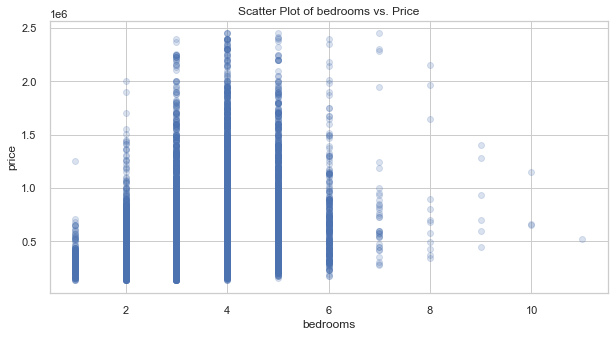

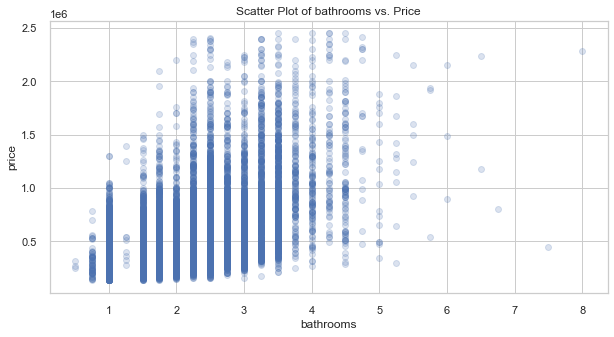

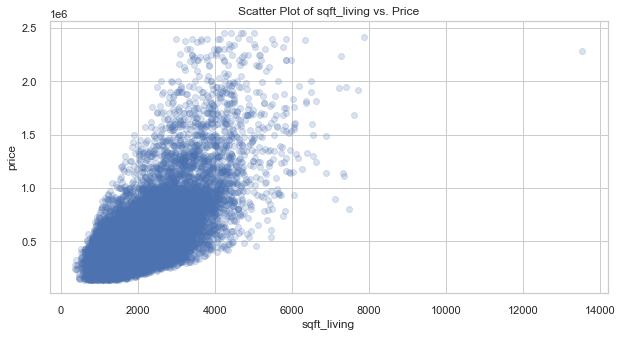

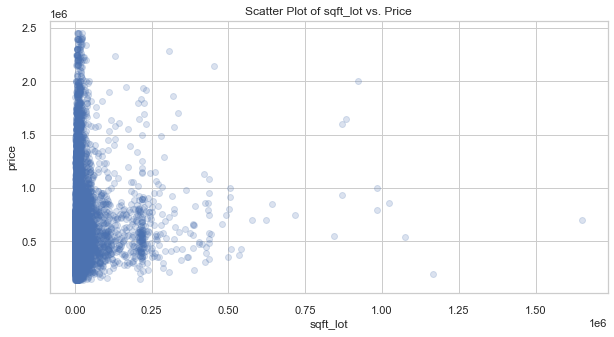

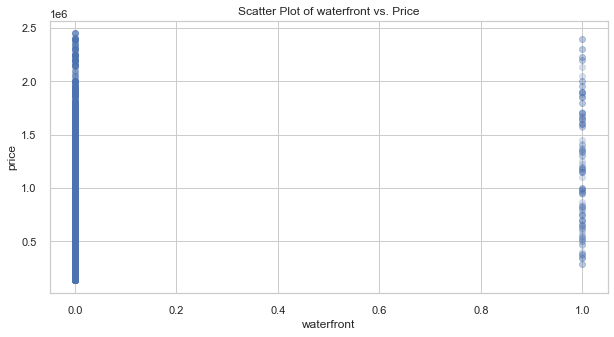

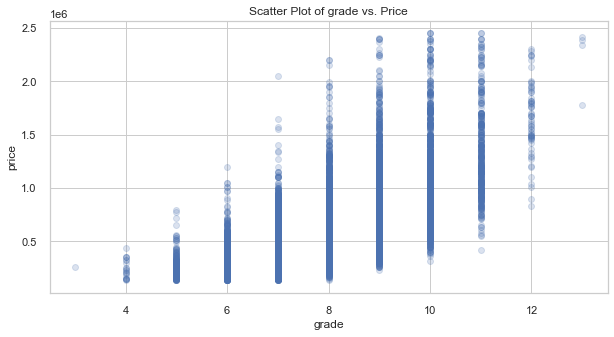

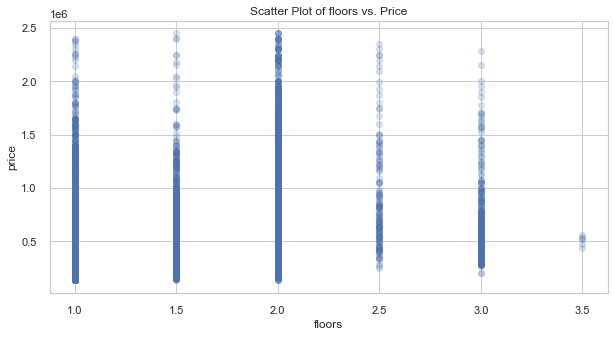

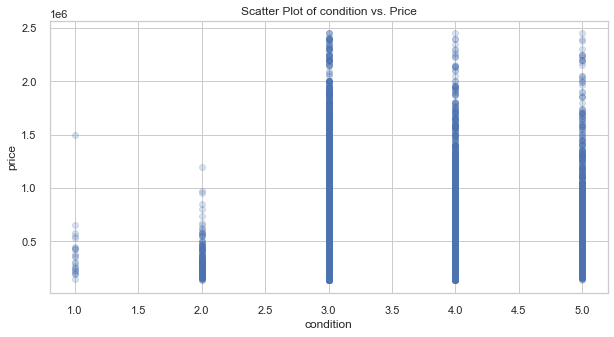

In [39]:
# Plotting Scatter plot
num_plots = len(df_subset.columns) - 1  # Subtract 1 to exclude "price"

for i, col in enumerate(df_subset.drop("price", axis=1).columns):
    plt.figure(figsize=(10, 5))
    plt.scatter(df_subset[col], df_subset["price"], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel("price")
    plt.title(f'Scatter Plot of {col} vs. Price')

    # Display each scatter plot
    plt.show()


The sqft_living feature seems to have the highest correlation with price


### Step 2: Build a simple Linear Model

In [40]:
# Explore the relationship to find our starting point
df_subset.corr()['price'].to_frame()

,price
bedrooms,0.316654
bathrooms,0.509486
sqft_living,0.682378
sqft_lot,0.098745
waterfront,0.164017
grade,0.678498
floors,0.271005
condition,0.035434
price,1.000000


In [41]:
y = df_subset["price"]

#sqft_living has the highest correlation of the 8 features
X_baseline = df_subset[["sqft_living"]]

In [42]:
from scipy import stats 
import statsmodels.api as sm
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.863e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:58:20   Log-Likelihood:            -2.9379e+05
No. Observations:               21377   AIC:                         5.876e+05
Df Residuals:                   21375   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.396e+04   3940.225      8.618      

 price^= 3.396e+04 + 239.2436sqft_living

Our model is statistically significant overall and explains about 47% of the variation in the house prices
Both our intercept and coefficient for grade are statistically significant

The sqft_living coefficient is about 239. it suggests that as the living space increases, the house price tends to increase by $239 per square foot





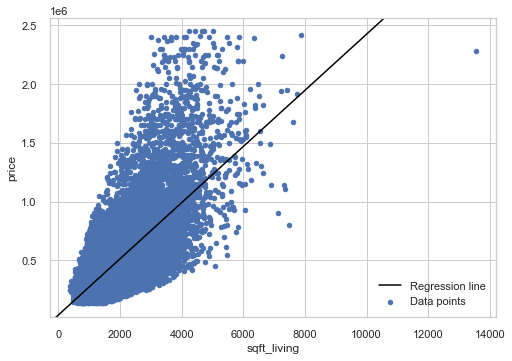

In [43]:
#plotting the regression line
fig, ax = plt.subplots()
df_subset.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

In [44]:
bm_score1 = baseline_results.rsquared_adj
bm_score1

0.46561507299674776

In [45]:
#Split the data into training and test sets. Use the default split size
X_baseline_train, X_baseline_test, y_baseline_train, y_baseline_test = train_test_split(X_baseline, y, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_baseline_train), len(X_baseline_test), len(y_baseline_train), len(y_baseline_test))

16032 5345 16032 5345


In [46]:
# y-intercept
X_baseline_train_bm_score1 = sm.add_constant(X_baseline_train)
X_baseline_test_bm_score1 = sm.add_constant(X_baseline_test)

In [47]:
# Calculate predictions on training and test sets
y_baseline_hat_train = baseline_results.predict(X_baseline_train_bm_score1)
y_baseline_hat_test = baseline_results.predict(X_baseline_test_bm_score1) 

In [48]:
# Calculate training and test residuals
train_baseline_residuals = y_baseline_hat_train - y_baseline_train
test_residuals = y_baseline_hat_test - y_baseline_test

In [49]:
# Calculate training and test MSE
train_baseline_mse = mean_squared_error(y_baseline_train, y_baseline_hat_train)
test_baseline_mse = mean_squared_error(y_baseline_test, y_baseline_hat_test)
print('Train Mean Squarred Error of baseline model:',train_baseline_mse )
print('Test Mean Squarred Error of baseline model:', test_baseline_mse)

Train Mean Squarred Error of baseline model: 50975099105.935196
Test Mean Squarred Error of baseline model: 49698669628.592964


## Multiple Regression Modeling 

In [50]:
y = df_subset['price']
y = y.values.ravel()
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [51]:
y_dtypes = y.dtype
y_dtypes

dtype('float64')

In [52]:
print(df_subset.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'grade', 'floors', 'condition', 'price'],
      dtype='object')


In [53]:
df_subset_dtypes = df_subset.dtypes
df_subset_dtypes

bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
waterfront     float64
grade           object
floors         float64
condition       object
price          float64
dtype: object

In [54]:
X = df_subset.drop("price", axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,floors,condition
0,3,1.00,1180,5650,0.0,7,1.0,3
1,3,2.25,2570,7242,0.0,7,2.0,3
2,2,1.00,770,10000,0.0,6,1.0,3
3,4,3.00,1960,5000,0.0,7,1.0,5
4,3,2.00,1680,8080,0.0,8,1.0,3
...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,0.0,8,3.0,3
21593,4,2.50,2310,5813,0.0,8,2.0,3
21594,2,0.75,1020,1350,0.0,7,2.0,3
21595,3,2.50,1600,2388,0.0,8,2.0,3


In [55]:
print(X.dtypes)

bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
waterfront     float64
grade           object
floors         float64
condition       object
dtype: object


**Using the pd.to_numeric() from pandas library to convert the object dtypes into numeric for regression analysis**

In [56]:
X['grade'] = pd.to_numeric(X['grade'], errors='coerce')
X['condition'] = pd.to_numeric(X['condition'], errors='coerce')


In [57]:
print(X.dtypes)

bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
waterfront     float64
grade            int64
floors         float64
condition        int64
dtype: object


In [58]:
model_2 = sm.OLS(y, sm.add_constant(X))
model_2_results = model_2.fit()
print(model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3481.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:00:25   Log-Likelihood:            -2.9157e+05
No. Observations:               21377   AIC:                         5.832e+05
Df Residuals:                   21368   BIC:                         5.832e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.052e+05   1.56e+04    -45.218      

**Comment**

price^ = -7.049e+05 -2.42e+04bedrooms -4.572e+04bathrooms + 168.7845sqft_living -0.2228sqft_lot +-0.2228waterfront + -0.2228grade + 3450.2247floors + 5.933e+04condition

* The R-squared value (0.566) is a measure of how well the independent variables(predictors) explain the variance in the          dependent variable(price).
* In this case, it indicates that approximately 57% of the variance in the "price" can be explained by the independent          variables included in the model.

The F-statistic of 2672 and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that at least one of the independent variables in the model is significantly related to the target variable.

In order to make the negative intercept more interpretable, we apply zero centering to the model.

In [59]:
bm_model_2_score = model_2_results.rsquared_adj
bm_model_2_score

0.5656736585623972

In [60]:
# Split the data into training and test sets. Use the default split size
X_model_2_train, X_model_2_test, y_model_2_train, y_model_2_test = train_test_split(X, y, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_model_2_train), len(X_model_2_test), len(y_model_2_train), len(y_model_2_test))

16032 5345 16032 5345


In [61]:
# y-intercept
X_model_2_train_bm = sm.add_constant(X_model_2_train)
X_test_model_2_bm = sm.add_constant(X_model_2_test)

In [65]:
# Calculate predictions on training and test sets
y_model_2_hat_train = model_2_results.predict(X_model_2_train_bm)
y_model_2_hat_test = model_2_results.predict(X_test_model_2_bm) 

In [66]:
# Calculate training and test residuals
train_model_2_residuals = y_model_2_hat_train - y_model_2_train
test_log_residuals = y_model_2_hat_test - y_model_2_test

In [67]:
# Calculate training and test MSE
train_model_2_mse = mean_squared_error(y_model_2_train, y_model_2_hat_train)
test_model_2_mse = mean_squared_error(y_model_2_test, y_model_2_hat_test)
print('Train Mean Squarred Error of model 2 transformed model:',train_model_2_mse )
print('Test Mean Squarred Error of model 2 transformed model:', test_model_2_mse)

Train Mean Squarred Error of model 2 transformed model: 41288833791.84333
Test Mean Squarred Error of model 2 transformed model: 40764016929.71354


In [68]:
X_centered = X.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,floors,condition
count,2.137700e+04,2.137700e+04,2.137700e+04,2.137700e+04,2.137700e+04,2.137700e+04,2.137700e+04,2.137700e+04
mean,4.919321e-17,6.913640e-17,2.260016e-13,3.485326e-13,-5.816765e-19,1.914547e-16,5.850003e-17,-1.755001e-16
std,8.977794e-01,7.517908e-01,8.781999e+02,4.160214e+04,7.251454e-02,1.142286e+00,5.393954e-01,6.489024e-01
min,-2.372222e+00,-1.611276e+00,-1.699068e+03,-1.457886e+04,-5.286055e-03,-4.650232e+00,-4.942462e-01,-2.411517e+00
25%,-3.722225e-01,-3.612761e-01,-6.390685e+02,-1.006486e+04,-5.286055e-03,-6.502316e-01,-4.942462e-01,-4.115171e-01
50%,-3.722225e-01,1.387239e-01,-1.590685e+02,-7.498865e+03,-5.286055e-03,-6.502316e-01,5.753848e-03,-4.115171e-01
75%,6.277775e-01,3.887239e-01,4.709315e+02,-4.490865e+03,-5.286055e-03,3.497684e-01,5.057538e-01,5.884829e-01
max,7.627778e+00,5.888724e+00,1.147093e+04,1.636260e+06,9.947139e-01,5.349768e+00,2.005754e+00,1.588483e+00


In [69]:
centered_model = sm.OLS(y, sm.add_constant(X_centered))
centered_results = centered_model.fit()
print(centered_results.summary())

print(f"""
Centered model adjusted R-Squared: {centered_results.rsquared_adj}
""")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3481.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:04:05   Log-Likelihood:            -2.9157e+05
No. Observations:               21377   AIC:                         5.832e+05
Df Residuals:                   21368   BIC:                         5.832e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.29e+05   1387.852    381.143      

In [70]:
centered_results.params

const          528969.864574
bedrooms       -26946.521502
bathrooms      -14380.848965
sqft_living       162.395590
sqft_lot           -0.187594
waterfront     521040.394098
grade          109029.886264
floors          -8133.018528
condition       57901.302289
dtype: float64

For a house with an average number of bedrooms, bathrooms, sqft_living,  area, sqft_lot area, waterfront, grade, floors and condition we would expect the price to be around $528969

## Model Evaluation

**Check For Normality**

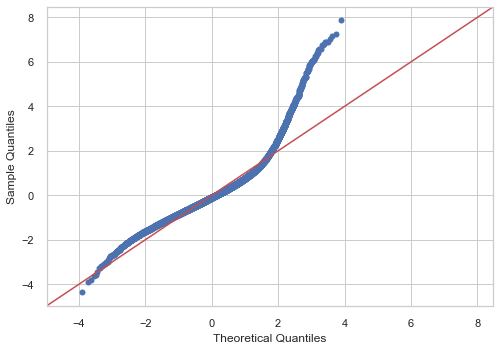

In [72]:
# Checking that the residuals are normally distributed
# Modify line color to orange and thickness
fig = sm.graphics.qqplot(model_2_results.resid, dist=stats.norm, line='45', fit=True);
# Getting the axes and modify the line color and thickness
ax = fig.get_axes()[0]
ax.get_lines()[0].set_color('Orange')  # Set line color to orange
ax.get_lines()[0].set_linewidth(2)  # Set line thickness to 2

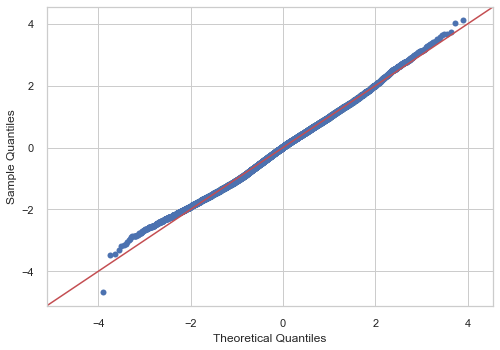

In [73]:
# Build log transformed model
y_log = np.log(y)
model = sm.OLS(y_log,  sm.add_constant(X)).fit()

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Getting the axes and modify the line color and thickness
ax = fig.get_axes()[0]
ax.get_lines()[0].set_color('Orange')  # Set line color to orange
ax.get_lines()[0].set_linewidth(2)  # Set line thickness to 2

# Show the QQ plot
plt.show()


In [74]:
log_results = model.summary()
print (log_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     3275.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:04:50   Log-Likelihood:                -7004.0
No. Observations:               21377   AIC:                         1.403e+04
Df Residuals:                   21368   BIC:                         1.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9028      0.026    422.381      

The R-squared value indicates that approximately 55% of the variance in the "price" can be explained by the independent    variables included in the model after log transformation.


The F-statistic of 3276 and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that at least one of the independent variables in the model is significantly related to the target variable.

**Comment**

* Normality Assumption: the points in the QQ-normal plot lie on a straight diagonal line and the deviations from the straight line are minimal. 
* This is a confirmation that this is a normal distribution.

In [75]:
bm_log_score = model.rsquared_adj
bm_log_score

0.5506591389197385

In [76]:
# Split the data into training and test sets. Use the default split size
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y_log, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_log_train), len(X_log_test), len(y_log_train), len(y_log_test))

16032 5345 16032 5345


In [77]:
# y-intercept
X_log_train_bm = sm.add_constant(X_log_train)
X_test_log_bm = sm.add_constant(X_log_test)

In [78]:
# Calculate predictions on training and test sets
y_log_hat_train = model.predict(X_log_train_bm)
y_log_hat_test = model.predict(X_test_log_bm) 

In [79]:
# Calculate training and test residuals
train_log_residuals = y_log_hat_train - y_log_train
test_log_residuals = y_log_hat_test - y_log_test


In [80]:
# Calculate training and test MSE
train_log_mse = mean_squared_error(y_log_train, y_log_hat_train)
test_log_mse = mean_squared_error(y_log_test, y_log_hat_test)
print('Train Mean Squarred Error of log transformed model:',train_log_mse )
print('Test Mean Squarred Error of log transformed model:', test_log_mse)

Train Mean Squarred Error of log transformed model: 0.11316788346170936
Test Mean Squarred Error of log transformed model: 0.11149163321339643


In [81]:
#Checking for heteroscedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_goldfeldquandt(y, X.values, alternative='two-sided')

(1.0551893511931372, 0.005508881507040191, 'two-sided')

If the p-value is 0.010791092222384824which is greater than 0.05,therefore we fail to reject the null hypothesis, suggesting that there is no strong evidence of heteroscedasticity.

**Summary Table**

In [83]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.DataFrame([[bm_score1, bm_model_2_score, bm_log_score],
              [train_baseline_mse, train_model_2_mse, train_log_mse],
              [test_baseline_mse, test_model_2_mse, test_log_mse]], 
             columns = ['Baseline Model', 'Model 2', 'log model'],
             index = ['Adj R Squared', 'RMSE_train', 'RMSE_test'])

,Baseline Model,Model 2,log model
Adj R Squared,0.465615,0.565674,0.550659
RMSE_train,50975099105.935196,41288833791.843330,0.113168
RMSE_test,49698669628.592964,40764016929.713539,0.111492


**Cross Validation of the log transformed Model**

In [84]:
linreg = LinearRegression()
linreg.fit(X_log_train, y_log_train)
mse = make_scorer(mean_squared_error)
cv_5_train = cross_val_score(linreg, X_log_train, y_log_train, cv=5, scoring=mse)
cv_5_test = cross_val_score(linreg, X_log_test, y_log_test, cv=5, scoring=mse)
cv_5_train_mean = cv_5_train.mean()
cv_5_test_mean = cv_5_test.mean()
print('Train cross validation score of Model 1:', cv_5_train_mean)
print('Test cross validation score of Model 1:', cv_5_test_mean)

Train cross validation score of Model 1: 0.11330225471481989
Test cross validation score of Model 1: 0.11197042261294263


In this case, it appears that the model's performance on the test data (test cross-validation score) is slightly better (lower MSE) than on the training data (train cross-validation score). This suggests that the model is performing reasonably well, and it's not exhibiting significant overfitting to the training data.

In [85]:
rmse = mean_squared_error(y_log, model.predict(sm.add_constant(X)), squared=False)
rmse

0.33578082448129115

Our RMSE suggests that the model's predictions are quite close to the actual prices, on average.

## CONCLUSION


From our data we can conclude that price is mainly determined by waterfront, sqft_living, grade.

Also, most houses have an average of 3 bedrooms.

For a house with an average number of bedrooms, bathrooms, sqft_living,  area, sqft_lot area, waterfront, grade, floors and condition we would expect the price to be aapproximately $528969. 

Most houses in our data are of average condition.





## RECOMMENDATIONS

1.  Investors should consider investing in houses with waterfronts as they generally fetch higher prices as per our analysis. Houses with waterfront views provides an opportunity for real estate agencies to specialize and cater to a niche market
 
 2. Investors can also invest in upgrading of properties in King County. According to our analysis, most houses are of average condition which provides an opportunity for investors to tap into the business of property improvements and maintenance to increase property value.

 3. According to our analysis, larger living spaces (sqft_living) can command higher prices. Sellers of properties with spacious living areas should emphasize this feature in listings.

 4. Buyers interested in high-quality properties should prioritize those with a higher grade as this will guarantee that the property meet high standards of building that will stand the test of time. Sellers should invest in improving the building specifications and standards to improve the grade of their properties as this is positively correlated to the price of the property. 

## NEXT STEPS

1. Supplementary data from the Kings County Housing sector to further improve the model's precision.

3. More current and longer cover period data to reach a more accurate conclusion for homeowners' reference.

